# Normality Testing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns # for nice looking plots
# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
n=50
def random_distributions(n=50):
  mu, sigma, p = 5, 2*np.sqrt(2), 0.3# mean, standard deviation, probabilty of success
  shape, scale = 2.5, 2. # mean=5, std=2*sqrt(2)
  normal_dist = np.random.normal(mu, sigma, n)
  lognormal_dist = np.random.lognormal(mu, sigma, n)
  lognormal_dist = np.random.lognormal(np.log2(mu), np.log2(sigma), n) 
  pareto_dist = np.random.pareto(mu, n)
  uniform_dist= np.random.uniform(np.amin(normal_dist),np.amax(normal_dist),n)
  binomial_dist= np.random.binomial(n, p,n)
  gamma_dist= np.random.gamma(shape, scale, n) 
  poisson_dist= np.random.poisson((n*0.05), n)  
  df = pd.DataFrame({'Normal' : normal_dist, 'Lognormal' : lognormal_dist, 'Pareto' : pareto_dist,'Gamma' : gamma_dist, 'Poisson' : poisson_dist, 'Binomial' : binomial_dist, 'Uniform' : uniform_dist})
  return df

In [3]:
df=random_distributions(n=50)
df.head()

,Binomial,Gamma,Lognormal,Normal,Pareto,Poisson,Uniform
0,18,1.351577,0.120581,9.028808,0.211529,3,2.480656
1,14,5.389884,64.117453,8.564877,0.323006,2,6.934677
2,19,7.188498,23.198153,2.402333,0.134899,0,11.536856
3,20,2.823998,14.529712,3.231106,0.480740,2,3.431370
4,16,5.316223,55.385839,4.819575,0.090275,0,5.394694


/Users/bear/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


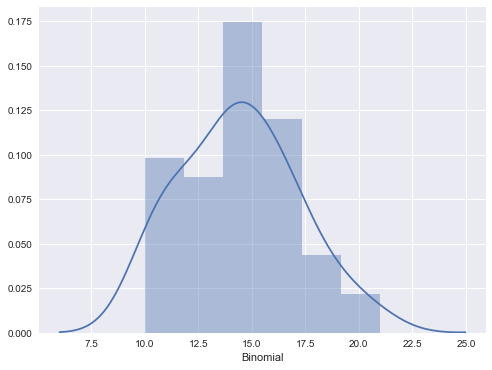

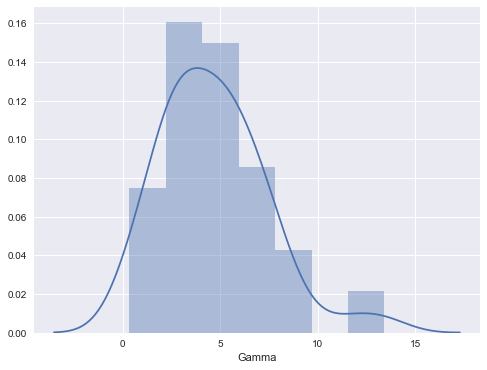

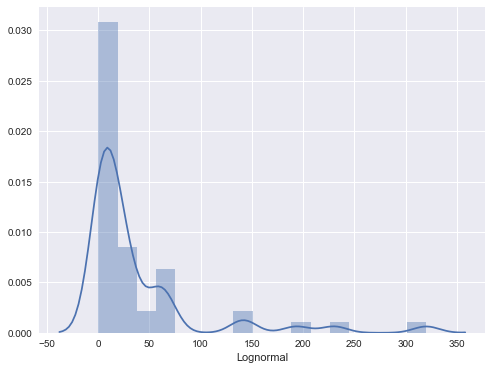

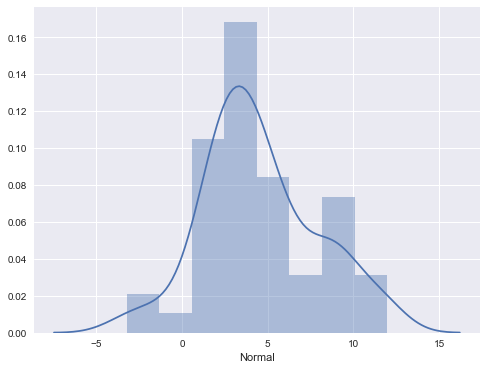

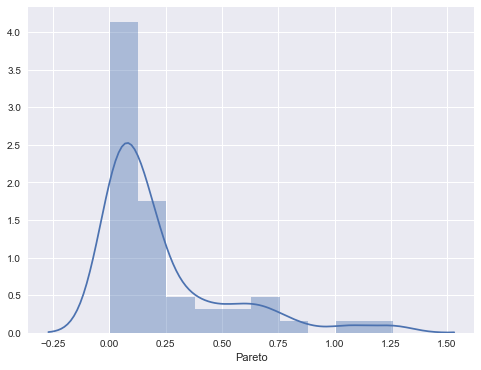

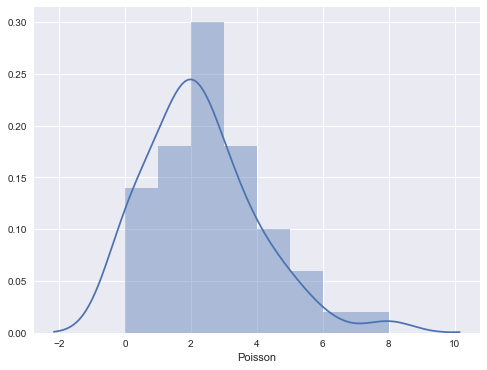

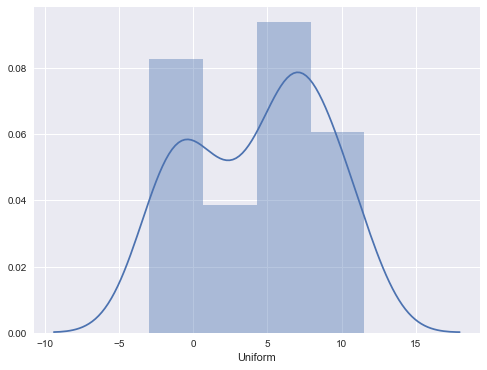

In [4]:
def show_distributions(df):
    for col in list(df.columns.values):    
      sns.distplot(df[col])
      sns.plt.show()
show_distributions(df)    
    

In [5]:
def qqplot_stats(obs, c):
    z = (obs-np.mean(obs))/np.std(obs)
    stats.probplot(z, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot for " + c)
    plt.show()
        

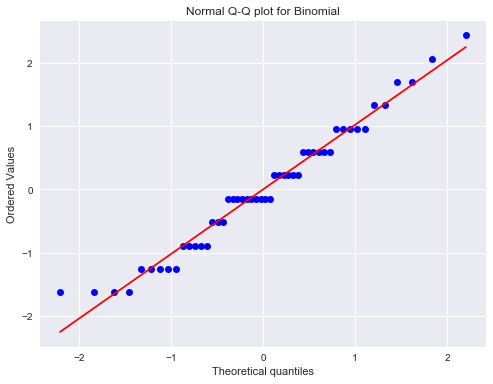

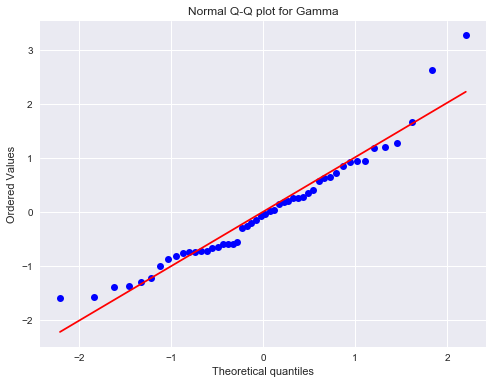

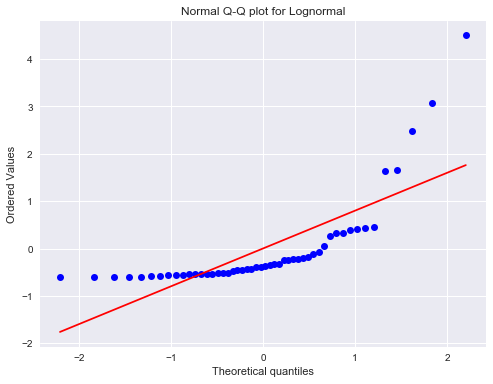

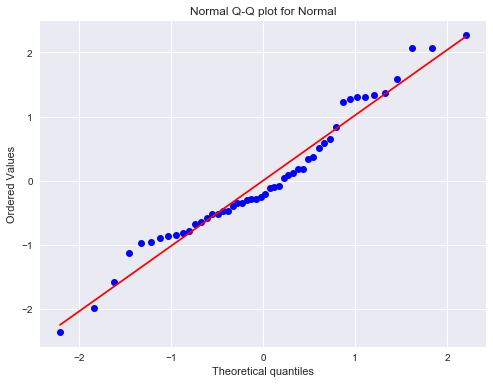

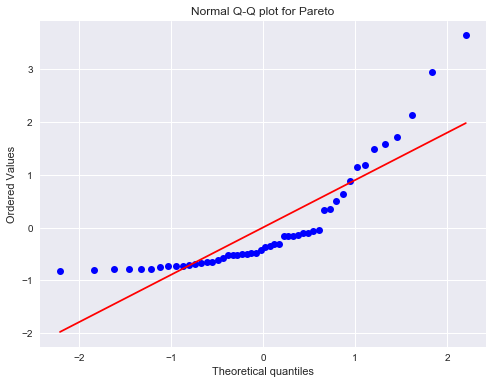

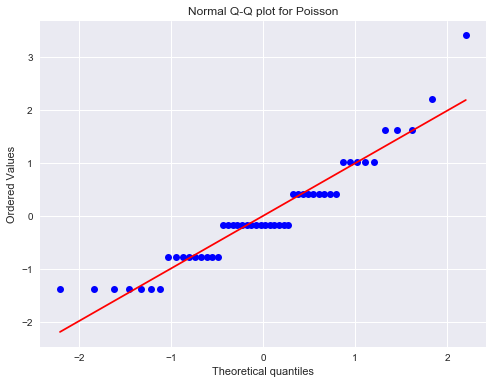

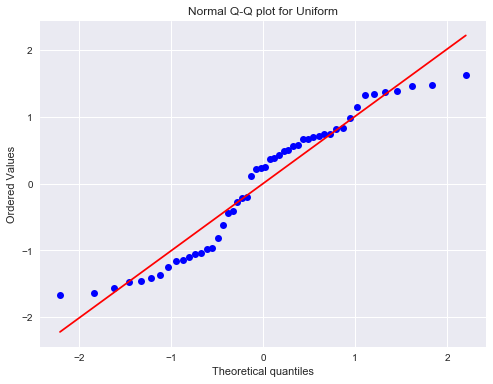

In [6]:
def qqplot_df(df):
    for col in list(df.columns.values):
      qqplot_stats(df[col], col)
qqplot_df(df) 

### Statistical tests for normality (e.g. Shapiro-Wilk test,  Anderson-Darling test, scipy.stats.normaltest, etc.)

In [7]:
def normality_stats(df):
    s={}
    for col in list(df.columns.values):
      s[col]={}
    for col in list(df.columns.values):
      s[col].update({'shapiro':stats.shapiro(df[col])})
      s[col].update({'anderson':stats.anderson(df[col], dist='norm')})
      s[col].update({'normaltest':stats.normaltest(df[col])})      
    return s


### Shapiro-Wilk test
scipy.stats.shapiro [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

scipy.stats.shapiro
scipy.stats.shapiro(x, a=None, reta=False)[source]
Perform the Shapiro-Wilk test for normality.

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

Parameters:	
x : array_like
Array of sample data.
a : array_like, optional
Array of internal parameters used in the calculation. If these are not given, they will be computed internally. If x has length n, then a must have length n/2.
reta : bool, optional
Whether or not to return the internally computed a values. The default is False.
Returns:	
W : float
The test statistic.
p-value : float
The p-value for the hypothesis test.
a : array_like, optional
If reta is True, then these are the internally computed “a” values that may be passed into this function on future calls.

### Anderson-Darling test

scipy.stats.anderson [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)

scipy.stats.anderson(x, dist='norm')
Anderson-Darling test for data coming from a particular distribution

The Anderson-Darling test is a modification of the Kolmogorov- Smirnov test kstest for the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

Parameters:	
x : array_like
array of sample data
dist : {‘norm’,’expon’,’logistic’,’gumbel’,’gumbel_l’, gumbel_r’,
‘extreme1’}, optional the type of distribution to test against. The default is ‘norm’ and ‘extreme1’, ‘gumbel_l’ and ‘gumbel’ are synonyms.
Returns:	
statistic : float
The Anderson-Darling test statistic
critical_values : list
The critical values for this distribution
significance_level : list
The significance levels for the corresponding critical values in percents. The function returns critical values for a differing set of significance levels depending on the distribution that is being tested against.

Note: The critical values are for a given significance level. When we want a smaller significance level, then we have to increase the critical values, assuming we are in the right, upper tail of the distribution.
 
### scipy.stats.normaltest

scipy.stats.normaltest [https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.normaltest.html](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.normaltest.html)
scipy.stats.normaltest(a, axis=0)
Tests whether a sample differs from a normal distribution.

This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s [R251], [R252] test that combines skew and kurtosis to produce an omnibus test of normality.

Parameters:	
a : array_like
The array containing the data to be tested.
axis : int or None
If None, the array is treated as a single data set, regardless of its shape. Otherwise, each 1-d array along axis axis is tested.
Returns:	
k2 : float or array
s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.
p-value : float or array
A 2-sided chi squared probability for the hypothesis test.

In [9]:
norm_stats=normality_stats(df)
print (norm_stats)

{'Binomial': {'shapiro': (0.9673869013786316, 0.1808331459760666), 'anderson': AndersonResult(statistic=0.48451908278259737, critical_values=array([ 0.538,  0.613,  0.736,  0.858,  1.021]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=0.9672405196635383, pvalue=0.61654728523387381)}, 'Gamma': {'shapiro': (0.9469306468963623, 0.025555899366736412), 'anderson': AndersonResult(statistic=0.55129773014765959, critical_values=array([ 0.538,  0.613,  0.736,  0.858,  1.021]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=9.7202137399568116, pvalue=0.0077496556413489213)}, 'Lognormal': {'shapiro': (0.6056225299835205, 2.3624491252149937e-10), 'anderson': AndersonResult(statistic=6.8821022994986834, critical_values=array([ 0.538,  0.613,  0.736,  0.858,  1.021]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=50.440953844

In [10]:
df=random_distributions(n=500)
df.head()

,Binomial,Gamma,Lognormal,Normal,Pareto,Poisson,Uniform
0,144,0.678620,5.408794,-0.202363,0.438728,28,12.777269
1,143,1.057645,1.776771,-0.279711,0.063076,34,3.678617
2,146,1.789624,5.321688,2.746554,0.597529,26,7.945900
3,153,4.577806,2.732208,7.742002,0.547826,28,8.015265
4,154,5.011832,104.951504,9.677674,1.427317,19,3.841137


/Users/bear/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


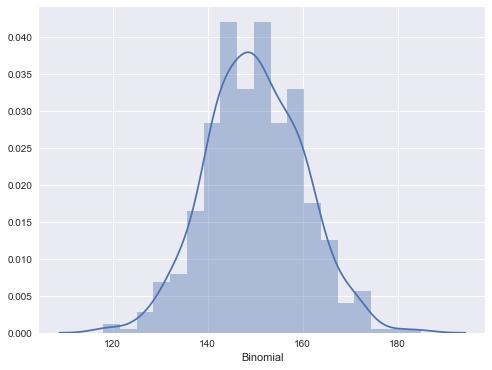

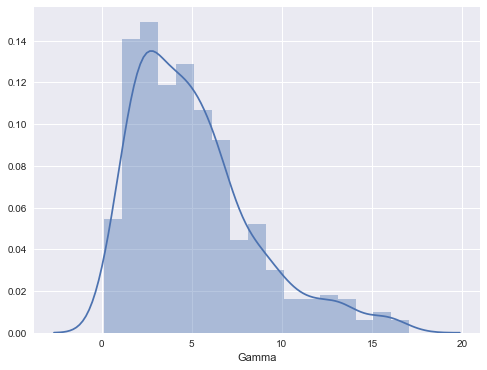

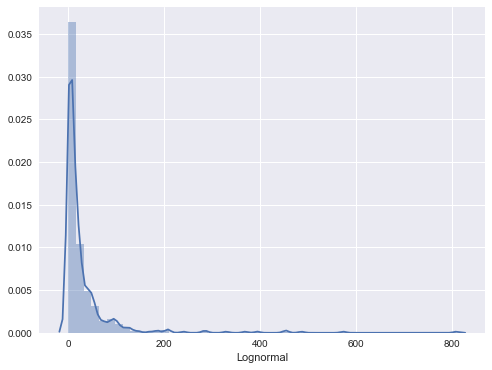

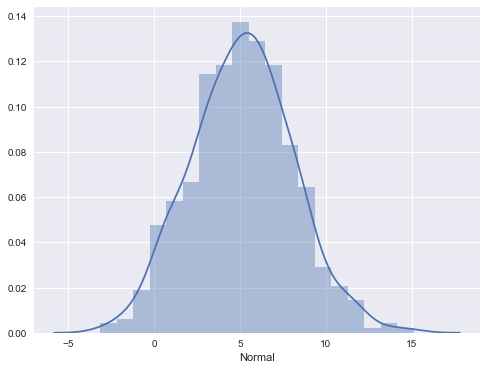

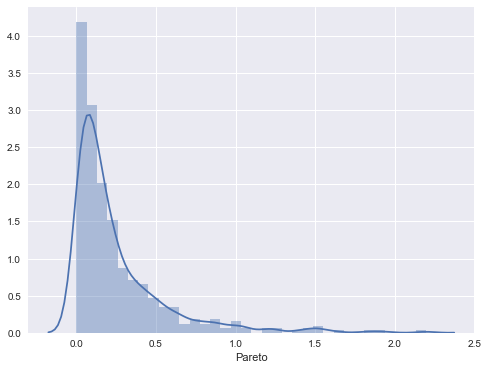

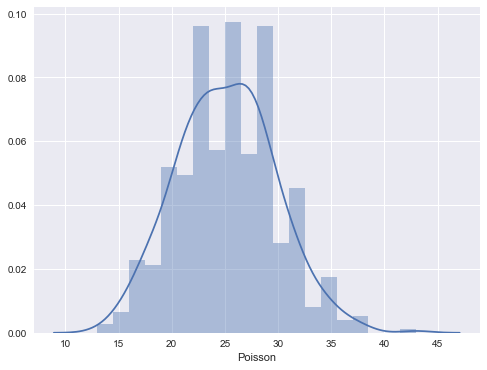

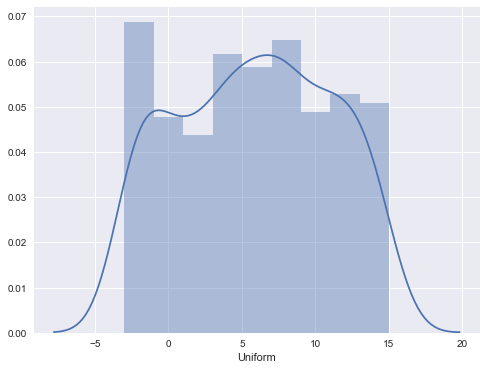

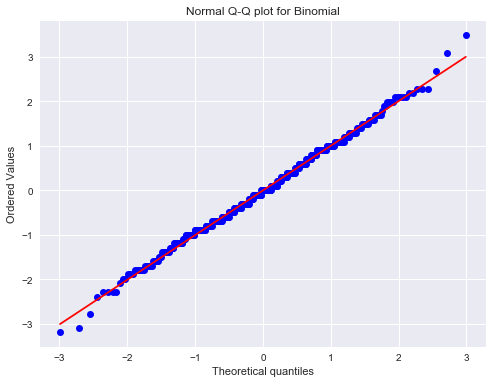

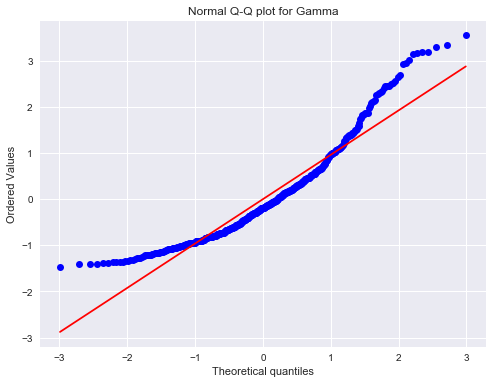

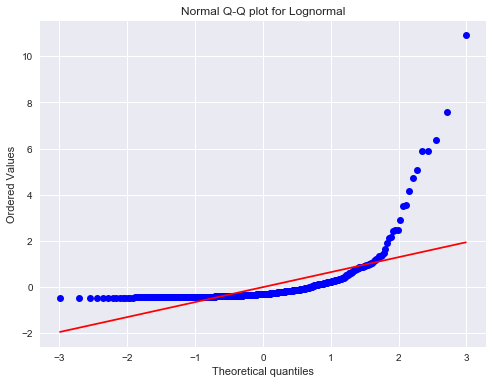

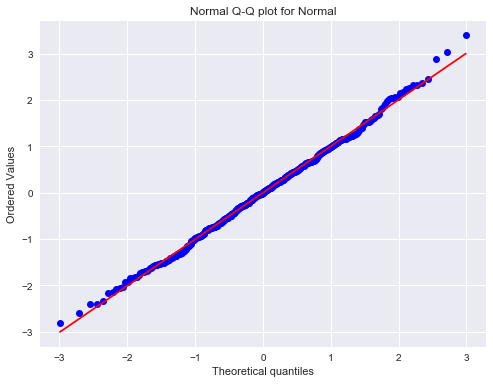

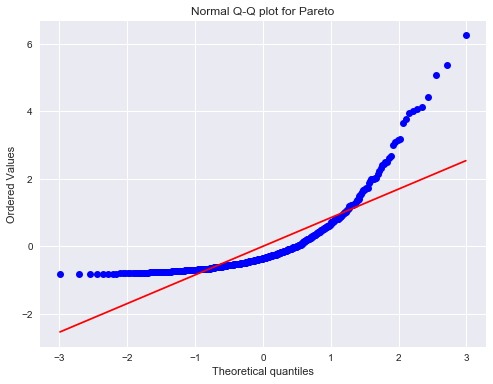

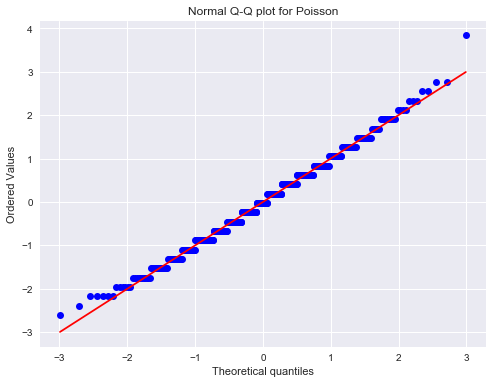

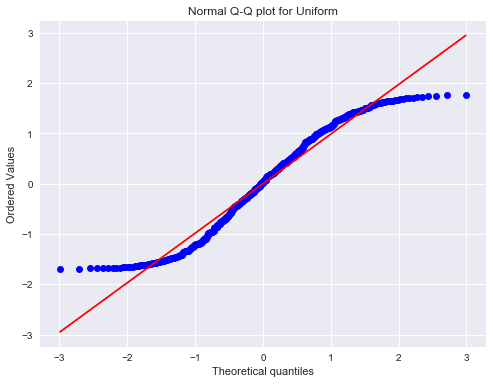

In [11]:
show_distributions(df)
qqplot_df(df)

In [13]:
norm_stats=normality_stats(df)
print (norm_stats)

{'Binomial': {'shapiro': (0.9968286752700806, 0.4382360577583313), 'anderson': AndersonResult(statistic=0.56094948549025503, critical_values=array([ 0.571,  0.651,  0.781,  0.911,  1.083]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=1.230108941374215, pvalue=0.54061144703031183)}, 'Gamma': {'shapiro': (0.9144567251205444, 3.351392529023434e-16), 'anderson': AndersonResult(statistic=10.941774830598604, critical_values=array([ 0.571,  0.651,  0.781,  0.911,  1.083]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=86.543833288121704, pvalue=1.6115559209108526e-19)}, 'Lognormal': {'shapiro': (0.42167073488235474, 4.343999231307435e-37), 'anderson': AndersonResult(statistic=84.209329093400811, critical_values=array([ 0.571,  0.651,  0.781,  0.911,  1.083]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=601.48967694

In [14]:
df=random_distributions(n=5000)
df.head()

,Binomial,Gamma,Lognormal,Normal,Pareto,Poisson,Uniform
0,1473,2.301277,61.283113,1.249188,0.644853,235,12.857180
1,1504,15.381796,11.641940,2.655536,0.392662,229,4.327440
2,1515,7.241475,0.498449,3.081865,0.258942,246,2.323925
3,1443,12.694502,4.211475,5.791111,0.641836,226,11.122338
4,1497,6.444043,288.881633,4.421360,0.045091,240,9.490512


/Users/bear/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


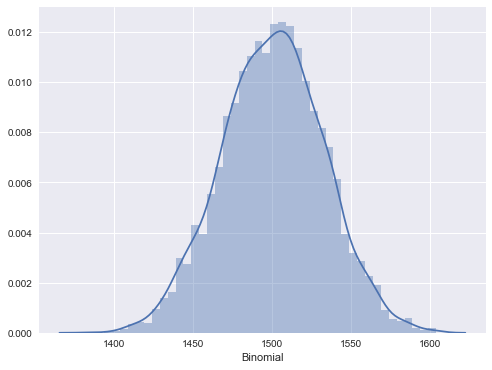

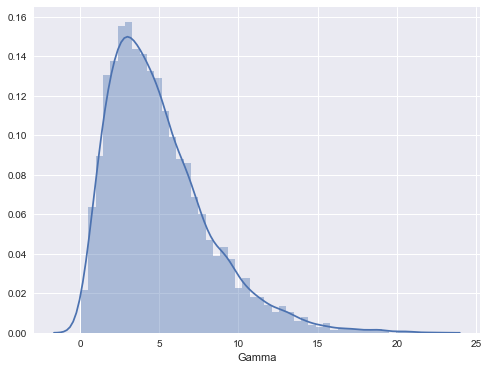

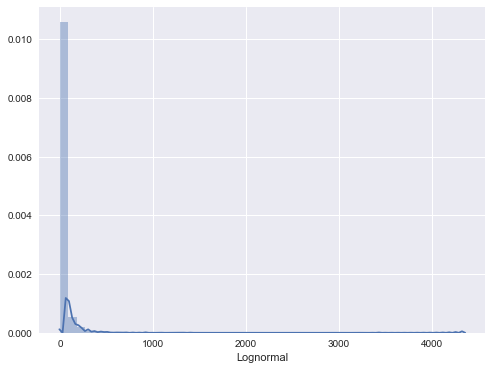

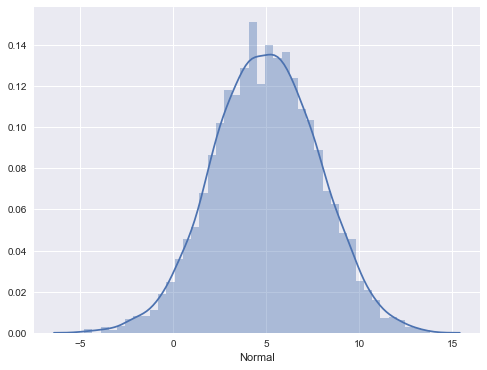

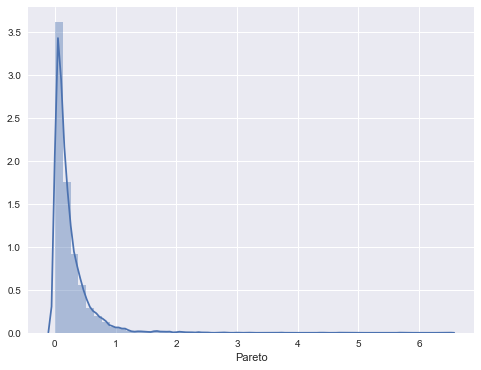

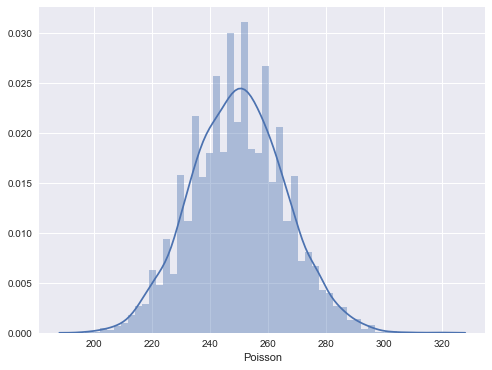

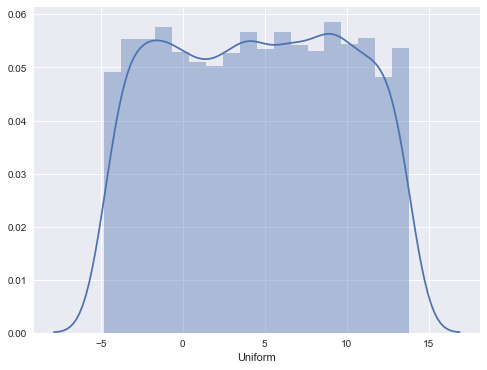

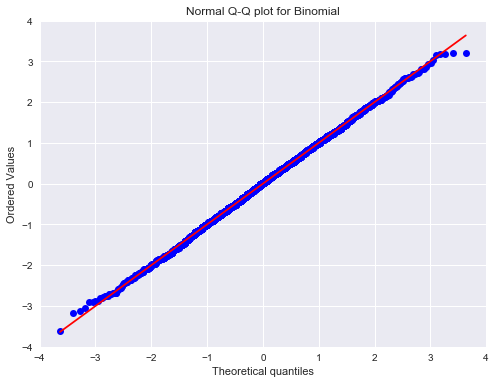

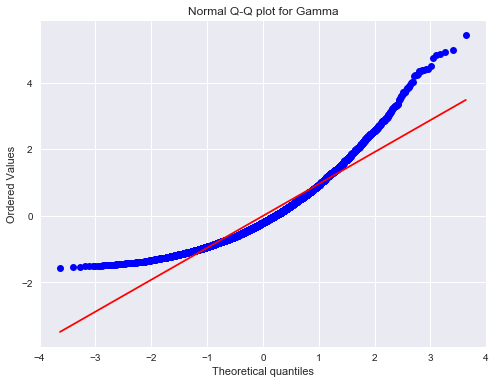

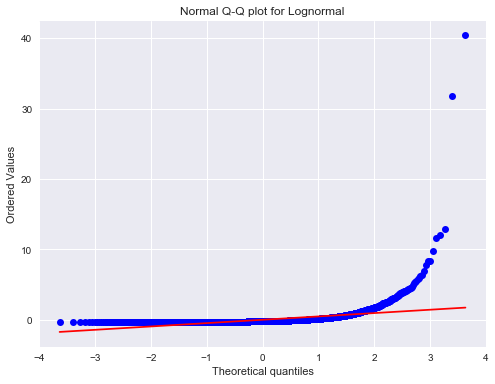

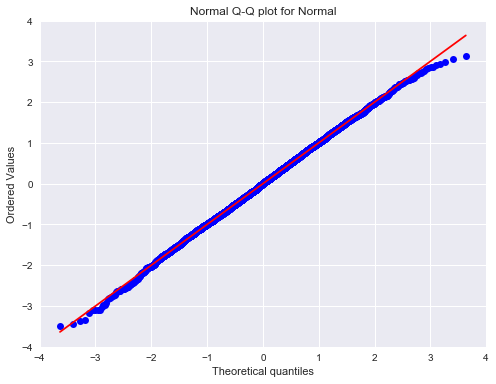

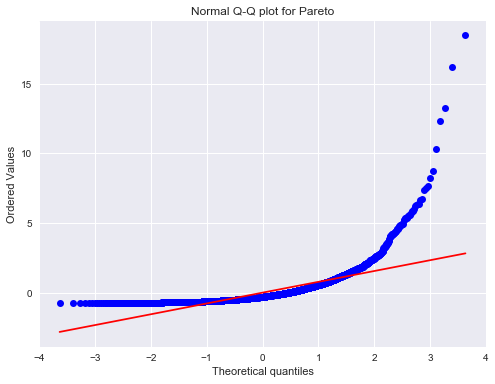

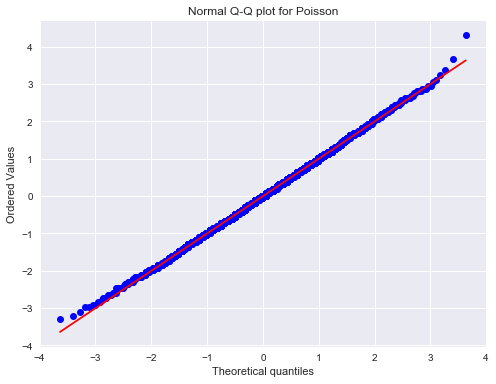

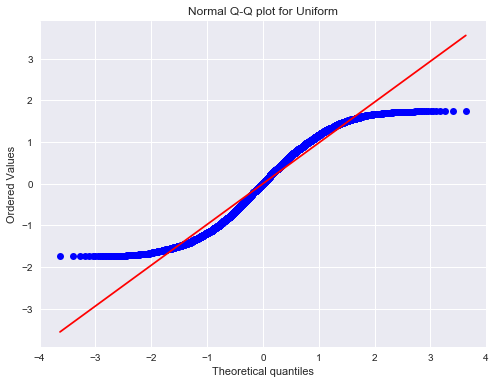

In [15]:
show_distributions(df)
qqplot_df(df)

In [16]:
norm_stats=normality_stats(df)
print (norm_stats)

{'Binomial': {'shapiro': (0.9995335936546326, 0.2695228159427643), 'anderson': AndersonResult(statistic=0.58199920208426192, critical_values=array([ 0.576,  0.655,  0.786,  0.917,  1.091]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=1.8804312612515037, pvalue=0.39054361311472058)}, 'Gamma': {'shapiro': (0.9175379276275635, 0.0), 'anderson': AndersonResult(statistic=93.698475834841702, critical_values=array([ 0.576,  0.655,  0.786,  0.917,  1.091]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=1044.8502093937791, pvalue=1.2991515697583735e-227)}, 'Lognormal': {'shapiro': (0.22745394706726074, 0.0), 'anderson': AndersonResult(statistic=1036.601695150679, critical_values=array([ 0.576,  0.655,  0.786,  0.917,  1.091]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=11532.698741585747, pvalue=0.0)}, 'Normal': {'s